In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import multiprocessing

In [2]:
image_dir = "data/"

In [3]:
def generate_target_dictionary():
    files = os.listdir(image_dir)
    types = list(set([file[:4] for file in files]))
    categories = {}
    for i in range(len(types)):
        categories[types[i]] = i
    return categories

def generate_dataset():
    categories = generate_target_dictionary()

    arr_x = []
    arr_y = []
    files = os.listdir(image_dir)
    i = 0
    for index in range(len(files)):
        filename = files[index]
        if index %10000 == 0:
            arr_x = np.array(arr_x)
            arr_y = np.array(arr_y)
            np.save(f'image_data_{index}', arr_x)
            np.save(f'target_data_{index}', arr_y)
            arr_x = []
            arr_y = []
            print('\nCheckpoint')

        img = cv2.imread(image_dir+filename, 0)
        arr_x.append(img)
        arr_y.append([categories[filename[:4]]])
        print(f'{i}\t/\t {len(files)}',end='\r',flush=True)
        i+= 1
    print('\nDone')
    arr_x = np.array(arr_x)
    arr_y = np.array(arr_y)
    np.save('image_data', arr_x)
    np.save('target_data', arr_y)
    print('Saved')
    return arr_x, arr_y
        

In [4]:
arr_x, arr = generate_dataset()


Checkpoint
9999	/	 100000
Checkpoint
19999	/	 100000
Checkpoint
29999	/	 100000
Checkpoint


KeyboardInterrupt: 

In [13]:
def get_image_data(index):
    if index % 5000 == 0:
        print(index)
    filename = files[index]
    img = cv2.imread(image_dir+filename, 0)
    cat = categories[filename[:4]]
    return [img, cat]

def sumall(value):
    return {"a": sum(range(1, value + 1)), "b": sum(range(1, value + 5))}

pool_obj = multiprocessing.Pool()

# answer = pool_obj.map(sumall,range(0,5))
# # print(answer['a'])
# # print(answer['b'])
# print(answer)
files = os.listdir(image_dir)
categories = generate_target_dictionary()
array = pool_obj.map(get_image_data, range(len(files)-1))


0
10000
5000
25000
35000
20000
30000
15000
50000
60000
45000
55000
40000
75000
70000
80000
65000


KeyboardInterrupt: 

Process ForkPoolWorker-71:
Process ForkPoolWorker-72:
Process ForkPoolWorker-68:
Process ForkPoolWorker-65:
Process ForkPoolWorker-66:
Process ForkPoolWorker-69:
Process ForkPoolWorker-67:
Process ForkPoolWorker-70:


In [4]:
categories = generate_target_dictionary()

arr_x = []
arr_y = []

i = 0
for filename in os.listdir(image_dir):
    img = cv2.imread(image_dir+filename, 0)
    arr_x.append(img)
    arr_y.append([categories[filename[:4]]])
    print(f'{i}\t/\t {100000}',end='\r',flush=True)
    i+= 1
print('\nDone')
arr_x = np.array(arr_x)
arr_y = np.array(arr_y)
np.save('image_data', arr_x)
np.save('target_data', arr_y)
print('Saved')
print(arr_x.shape)
print(arr_y.shape)

KeyboardInterrupt: 

(275, 210)


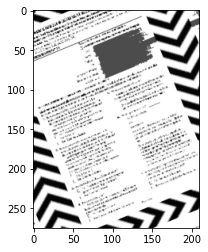

In [13]:
files = os.listdir(image_dir)

img = cv2.imread(image_dir+files[2], 0)
print(img.shape)
plt.imshow(img, cmap='gray')

In [45]:
arr_x = np.empty((0,275,210))
arr_y = np.empty((0),int)
print(arr_x.shape)
arr_x = np.append(arr_x, [img],0)
arr_x = np.append(arr_x, [img],0)
print(arr_x.shape)

(0, 275, 210)
(2, 275, 210)


In [49]:
types = list(set([file[:4] for file in files]))
categories = {}
for i in range(len(types)):
    categories[types[i]] = i
print(categories[files[4667][:4]])

2


In [55]:
arr_x = []
for x in range(100):
    arr_x.append(cv2.imread(image_dir+files[i], 0))
arr_x = np.array(arr_x)
arr_x.shape


(100, 275, 210)

In [44]:
arr_y = np.append(arr_y, 1, 0)
arr_y.shape

ValueError: zero-dimensional arrays cannot be concatenated